#### 
Model evaluation criterion:
Since this is a binary classification problem, the model can make wrong predictions in one of two ways:
Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity
Predicting a customer is eligible for a loan when the customer is actually not - Financial Loss

How to reduce this loss i.e need to reduce False Negatives?¶
In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words Recall is the evaluation criterion to be maximized.

# Task 2
1. Explain your intuition behind the features used for modeling.
2. Are you creating new derived features? If yes explain the intuition behind them.
3. Are there missing values? If yes how you plan to handle it.
4. How categorical features are handled for modeling.
5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
6. Do you plan to drop the correlated feature? If yes then how.
7. Which ML algorithm you plan to use for modeling.
8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.
9. How you will select the hyperparameters for models trained in above step.
10. Which metric(s) you will choose to select between the set of models.
11. Explain how you will export the trained models & deploy it for prediction in production.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
applicant = pd.read_csv("D://CSV files//Reunion assignment data//data//applicant.csv")
loan = pd.read_csv("D://CSV files//Reunion assignment data//data//loan.csv")

### As the dataset is in 2 parts so we can merge these 2 data sets in 1 by using `application_id`

In [29]:
df = applicant.merge(loan, right_on='applicant_id',left_on='applicant_id')

In [30]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
applicant_id,1469590,1203873,1432761,1207582,1674436,1213971,1428822,1705739,1715169,1722991,...,1354034,1365267,1237705,1609685,1615010,1880194,1114064,1758046,1824545,1660770
Primary_applicant_age_in_years,67,22,49,45,53,35,53,35,61,28,...,37,34,23,30,50,31,40,38,23,27
Gender,male,female,male,male,male,male,male,male,male,male,...,male,male,male,male,male,female,male,male,male,male
Marital_status,single,divorced/separated/married,single,single,single,single,single,single,divorced/separated,married/widowed,...,single,single,married/widowed,single,single,divorced/separated/married,divorced/separated,single,single,single
Number_of_dependents,1,1,2,2,2,2,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
Housing,own,own,own,for free,for free,for free,own,rent,own,own,...,own,own,rent,own,own,own,own,own,for free,own
Years_at_current_residence,4,2,3,4,4,4,4,2,4,2,...,1,4,4,3,3,4,4,4,4,4
Employment_status,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,management / self-employed / highly qualified ...,...,unskilled - resident,unskilled - resident,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,skilled employee / official
Has_been_employed_for_at_least,7 years,1 year,4 years,4 years,1 year,1 year,7 years,1 year,4 years,NaN,...,0 year,7 years,4 years,NaN,7 years,4 years,1 year,7 years,1 year,NaN
Has_been_employed_for_at_most,NaN,4 years,7 years,7 years,4 years,4 years,NaN,4 years,7 years,0 year,...,1 year,NaN,7 years,0 year,NaN,7 years,4 years,NaN,4 years,0 year


## Name and discription of columns

- `applicant_id`: Application ID of each Applicant
- `Primary_applicant_age_in_years`: 
- `Gender`: Gender of each applicant
- `Marital_status`: Marriage status 
- `Number_of_dependents`: Number of depend people of applicant
- `Housing`: House of the applicant
- `Years_at_current_residence`: For how many years does the applicant is living in the place
- `Employment_status`: The employment status
- `Has_been_employed_for_at_least`: Atleast for how long the applicant is employed
- `Has_been_employed_for_at_most`: Atmost for how long the applicant is employed
- `Telephone`: Telephone type
- `Foreign_worker`: 
- `Savings_account_balance`: Type of Account balance of saving account (Low/ Medium/ High)
- `Balance_in_existing_bank_account_(lower_limit_of_bucket)`: 
- `Balance_in_existing_bank_account_(upper_limit_of_bucket)`: 
- `loan_application_id`: Application ID of loan
- `Months_loan_taken_for`: The Duration of loan
- `Purpose`: Purpose of loan
- `Principal_loan_amount`: The amount of loan
- `EMI_rate_in_percentage_of_disposable_income`: Interest rate
- `Property`: The type of property applicant own
- `Has_coapplicant`: Does the applicant has any co-aplicant
- `Has_guarantor`: Does the applicant has any guarantor
- `Other_EMI_plans`: Does the applicant has any other EMI plans
- `Number_of_existing_loans_at_this_bank`: How many loan does the applicant has on the current bank
- `Loan_history`: Does the applicant has any loan history
- `high_risk_applicant`: Is the applicant high risk (1) or low risk (0)

In [31]:
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

## 1. Explain your intuition behind the features used for modeling.


1. First we will drop the `applicant_id` and `loan_application_id` columns as they are not useful in modelling process.
2. **The important columns for modelling are** 
- `Primary_applicant_age_in_years`: Age is correlated to the high_risk_applicant column.
- `Gender`: As most of the low risk applicants are male so gender will determine the risk of applicant 
- `Marital_status`: Marriage status is also related to whether the person is high risk applicant or not
- `Number_of_dependents`: More the number of dependent, high is the chance of applicant being high risk as they have to take care of more people and there is a chance that they become defaulter in loan payment
- `Housing`: If applicant has their own house then they are more likely to pay back loan as they don't have to pay house rent.
- `Years_at_current_residence`: If applicant is residing at same place more long time then they are less likely to become defaulter in loan payment.
- `Employment_status`: If applicant is employed then they will have money to payback the loan. Unemployed people are less likely to payback loan
- `Has_been_employed_for_at_least`: If applicant is employed for more time then they are more likely to pay back loan.
- `Foreign_worker`: Being foreign worker does not effect the performance of the model. But as this column does not have any missing values so we will keep this column.
- `Savings_account_balance`: The more balance the applicant have in their saving bank account, more likely they will payback the loan amount.
- `Months_loan_taken_for`: The Duration of loan has direct effect on the risk of applicant.
- `Purpose`: Purpose also effect the risk of applicant. If applicant want to buy expensive things then they are less likely to payback loan as compared to those who took loan for daily household things.
- `Principal_loan_amount`: Most of the applicants who ask for loan of high amount are high risk candidates. 
- `EMI_rate_in_percentage_of_disposable_income`: Those candidate who have high EMI rate are high risk candidate
- `Property`: If the candidate have good property that means they have money and are morelikey to payback the loan.
- `Has_coapplicant`: This column has effect on the target column
- `Has_guarantor`: This column also effect the target column
- `Number_of_existing_loans_at_this_bank`: Is applicant have  low number of existing loan then they are low risk candidate
- `Loan_history`: Loan history tells about the applicant

- `high_risk_applicant`: **Target**

In [32]:
df.drop(['applicant_id', 'Has_been_employed_for_at_most',
       'Telephone', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id',  'Other_EMI_plans'] , axis=1, inplace=True)

In [33]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Primary_applicant_age_in_years,67,22,49,45,53,35,53,35,61,28,...,37,34,23,30,50,31,40,38,23,27
Gender,male,female,male,male,male,male,male,male,male,male,...,male,male,male,male,male,female,male,male,male,male
Marital_status,single,divorced/separated/married,single,single,single,single,single,single,divorced/separated,married/widowed,...,single,single,married/widowed,single,single,divorced/separated/married,divorced/separated,single,single,single
Number_of_dependents,1,1,2,2,2,2,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
Housing,own,own,own,for free,for free,for free,own,rent,own,own,...,own,own,rent,own,own,own,own,own,for free,own
Years_at_current_residence,4,2,3,4,4,4,4,2,4,2,...,1,4,4,3,3,4,4,4,4,4
Employment_status,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,management / self-employed / highly qualified ...,...,unskilled - resident,unskilled - resident,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,skilled employee / official
Has_been_employed_for_at_least,7 years,1 year,4 years,4 years,1 year,1 year,7 years,1 year,4 years,NaN,...,0 year,7 years,4 years,NaN,7 years,4 years,1 year,7 years,1 year,NaN
Foreign_worker,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Savings_account_balance,NaN,Low,Low,Low,Low,NaN,High,Low,Very high,Low,...,NaN,Medium,NaN,Low,NaN,Low,Low,Low,Low,Medium


## 2. Are you creating new derived features? If yes explain the intuition behind them.

No, I am not creating any new derived feature as for nor the old featuresare good for now. If in further process there is a need to create any new feature then I will create it otherwise these features are sufficient.

## Splitting dataset into train and test set
We are splitting data before performing any pre-processing on the data, just to avoid data leakage.

In [34]:
x = df.drop(['high_risk_applicant'],axis=1)
y = df['high_risk_applicant']

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test= train_test_split(x,y,test_size=0.2)

In [36]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 19) (200, 19) (800,) (200,)


## 3. Are there missing values? If yes how you plan to handle it.

In [37]:
df.isna().sum()

Primary_applicant_age_in_years                   0
Gender                                           0
Marital_status                                   0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Employment_status                                0
Has_been_employed_for_at_least                  62
Foreign_worker                                   0
Savings_account_balance                        183
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant            

In [38]:
print("the percentage of missing values of each column")
(df.isna().sum()/10).reset_index().rename(columns={"index":"Column",0:"Percentage of missing values"})

the percentage of missing values of each column


,Column,Percentage of missing values
0,Primary_applicant_age_in_years,0.0
1,Gender,0.0
2,Marital_status,0.0
3,Number_of_dependents,0.0
4,Housing,0.0
5,Years_at_current_residence,0.0
6,Employment_status,0.0
7,Has_been_employed_for_at_least,6.2
8,Foreign_worker,0.0
9,Savings_account_balance,18.3


**As we can see all these column don't have missing values more than 20%. So fill these null values**

### Getting those columns which have null values and checking their distribution for imputation

In [39]:
nul_col = [i for i in df.columns
          if df[i].isna().sum() > 0]
nul_col

['Has_been_employed_for_at_least',
 'Savings_account_balance',
 'Purpose',
 'Property']

#### Now checking the distribution of these null values

In [40]:
df[nul_col].head()

,Has_been_employed_for_at_least,Savings_account_balance,Purpose,Property
0,7 years,NaN,electronic equipment,real estate
1,1 year,Low,electronic equipment,real estate
2,4 years,Low,education,real estate
3,4 years,Low,FF&E,building society savings agreement/life insurance
4,1 year,Low,new vehicle,NaN


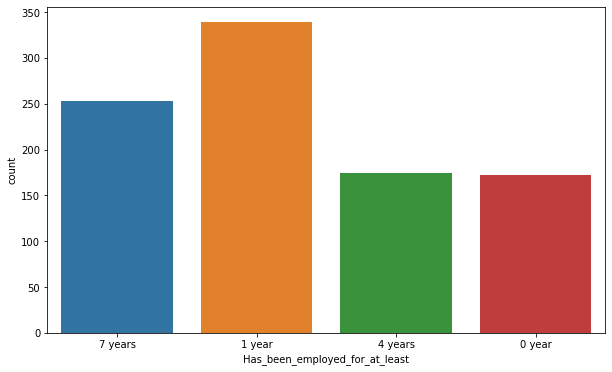

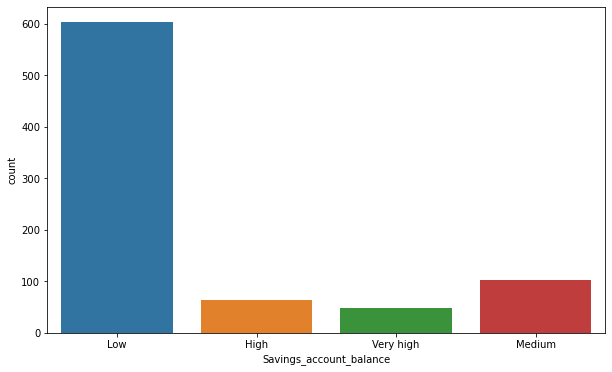

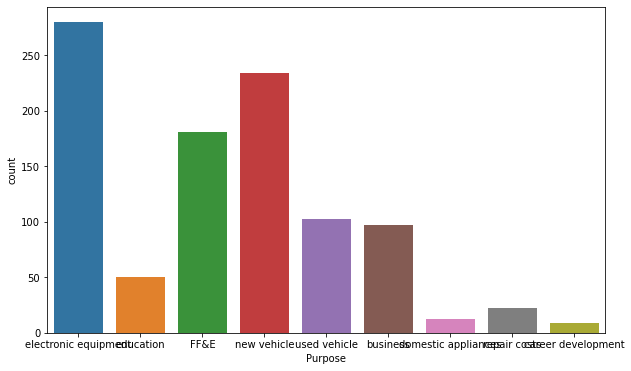

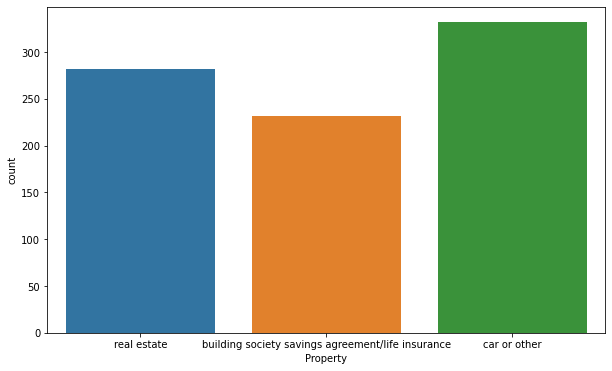

In [41]:
for i in nul_col:
    plt.figure(figsize=(10,6))
    sns.countplot(x=i,data=df)

### As these are all categorical column. So we will fill all the null values with their mode( most common values)

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
impute = SimpleImputer(strategy='most_frequent')

In [44]:
x_train_impute = x_train.copy()
x_test_impute = x_test.copy()

x_train_impute[:] = impute.fit_transform(x_train[:])
x_test_impute[:] = impute.transform(x_test[:])

In [45]:
x_train_impute.T

,738,103,212,717,806,102,406,128,188,562,...,132,158,481,281,547,120,965,764,941,190
Primary_applicant_age_in_years,45,35,50,32,26,24,43,34,20,29,...,27,38,26,50,32,25,26,27,31,54
Gender,male,male,male,male,male,female,male,male,male,female,...,male,male,male,male,male,female,female,male,male,male
Marital_status,single,single,single,single,married/widowed,divorced/separated/married,single,single,married/widowed,divorced/separated/married,...,single,single,single,single,single,divorced/separated/married,divorced/separated/married,married/widowed,single,single
Number_of_dependents,2,1,1,1,1,1,2,1,1,1,...,1,1,1,1,2,1,1,1,2,1
Housing,own,rent,own,for free,own,own,own,own,own,own,...,own,own,own,own,own,own,own,own,own,own
Years_at_current_residence,3,3,4,2,3,2,4,2,1,1,...,3,3,1,2,1,2,1,3,2,3
Employment_status,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,skilled employee / official,skilled employee / official,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,...,unskilled - resident,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,unskilled - resident,management / self-employed / highly qualified ...
Has_been_employed_for_at_least,4 years,4 years,1 year,1 year,0 year,1 year,4 years,1 year,4 years,0 year,...,0 year,4 years,0 year,1 year,4 years,1 year,1 year,4 years,1 year,1 year
Foreign_worker,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Savings_account_balance,Low,Low,Low,Low,Low,Low,Low,Low,Medium,Low,...,Low,Medium,Low,Low,Low,Low,Low,Medium,Low,Very high


In [54]:
x_test_impute.T

,684,357,635,914,475,807,850,491,443,382,...,857,167,299,667,59,325,920,478,48,843
Primary_applicant_age_in_years,31,26,47,31,26,65,33,42,41,25,...,28,20,32,27,23,39,28,39,39,50
Gender,male,male,male,male,female,male,male,female,male,female,...,male,female,male,female,female,male,female,male,male,male
Marital_status,single,single,single,single,divorced/separated/married,single,married/widowed,divorced/separated/married,single,divorced/separated/married,...,single,divorced/separated/married,single,divorced/separated/married,divorced/separated/married,single,divorced/separated/married,single,single,single
Number_of_dependents,2,1,2,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
Housing,own,own,own,rent,rent,own,rent,for free,own,rent,...,for free,own,own,own,rent,own,own,own,own,own
Years_at_current_residence,3,2,4,2,4,4,2,4,4,4,...,2,1,2,1,4,4,2,4,4,4
Employment_status,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,skilled employee / official,...,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,unskilled - resident,unskilled - resident,skilled employee / official,unskilled - resident,unskilled - resident,skilled employee / official
Has_been_employed_for_at_least,4,1,7,1,0,7,1,7,7,4,...,1,0,4,1,0,4,1,4,1,4
Foreign_worker,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Savings_account_balance,Medium,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Low,Very high,Very high,Low,Low,Low,Low,Medium,Low,Low


In [46]:
x_train_impute.isna().sum() 

Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Foreign_worker                                 0
Savings_account_balance                        0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
dtype: int64

### As we can see that the `Has_been_comployed_for_at_least` column has alpha numeric values. So, converting this column into numerical column

In [47]:
def func(a):
    return a.split(" ")[0]

x_train_impute['Has_been_employed_for_at_least'] = x_train_impute['Has_been_employed_for_at_least'].apply(func).astype('int64')

In [48]:
x_test_impute['Has_been_employed_for_at_least'] = x_test_impute['Has_been_employed_for_at_least'].apply(func).astype('int64')

## 4. How categorical features are handled for modeling.

In [49]:
x_train_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 738 to 190
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               800 non-null    int64 
 1   Gender                                       800 non-null    object
 2   Marital_status                               800 non-null    object
 3   Number_of_dependents                         800 non-null    int64 
 4   Housing                                      800 non-null    object
 5   Years_at_current_residence                   800 non-null    int64 
 6   Employment_status                            800 non-null    object
 7   Has_been_employed_for_at_least               800 non-null    int64 
 8   Foreign_worker                               800 non-null    int64 
 9   Savings_account_balance                      800 non-null    object
 10  Months_loan_

### Separating Numerical and categorical columns

In [51]:
num_col = [i for i in x_train_impute.columns
              if x_train_impute[i].dtype == 'int64']
num_col

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Has_been_employed_for_at_least',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank']

In [52]:
cat_col = list(set(x_train_impute.columns) - set(num_col))
cat_col

['Marital_status',
 'Purpose',
 'Loan_history',
 'Housing',
 'Savings_account_balance',
 'Employment_status',
 'Gender',
 'Property']

### Now we will convert Categorical column into numerical columns
Here we will  use 2 step. In step 1 method we will convert those categorical column which are ordinal like Savings_account_balance and in step2 we will convert rest of the categorical column using the one hot encoder class

In [56]:
x_train_impute['Savings_account_balance'] = x_train_impute['Savings_account_balance'].replace(
                                            {'Low':1, 'High':3, 'Very high':4, 'Medium':2})

In [58]:
x_test_impute['Savings_account_balance'] = x_test_impute['Savings_account_balance'].replace(
                                            {'Low':1, 'High':3, 'Very high':4, 'Medium':2})

In [59]:
x_test_impute.T

,684,357,635,914,475,807,850,491,443,382,...,857,167,299,667,59,325,920,478,48,843
Primary_applicant_age_in_years,31,26,47,31,26,65,33,42,41,25,...,28,20,32,27,23,39,28,39,39,50
Gender,male,male,male,male,female,male,male,female,male,female,...,male,female,male,female,female,male,female,male,male,male
Marital_status,single,single,single,single,divorced/separated/married,single,married/widowed,divorced/separated/married,single,divorced/separated/married,...,single,divorced/separated/married,single,divorced/separated/married,divorced/separated/married,single,divorced/separated/married,single,single,single
Number_of_dependents,2,1,2,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
Housing,own,own,own,rent,rent,own,rent,for free,own,rent,...,for free,own,own,own,rent,own,own,own,own,own
Years_at_current_residence,3,2,4,2,4,4,2,4,4,4,...,2,1,2,1,4,4,2,4,4,4
Employment_status,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,skilled employee / official,...,skilled employee / official,skilled employee / official,skilled employee / official,skilled employee / official,unskilled - resident,unskilled - resident,skilled employee / official,unskilled - resident,unskilled - resident,skilled employee / official
Has_been_employed_for_at_least,4,1,7,1,0,7,1,7,7,4,...,1,0,4,1,0,4,1,4,1,4
Foreign_worker,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Savings_account_balance,2,1,1,1,1,1,1,1,1,1,...,1,4,4,1,1,1,1,2,1,1


In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

### Here we will split the numerical and categorical features into 2 datasets, then we will apply one hot encoding on categorical feature dataset and then combine the encoded dataset to numerical dataset

In [61]:
num_col = [i for i in x_train_impute.columns
              if x_train_impute[i].dtype == 'int64']

cat_col = list(set(x_train_impute.columns) - set(num_col))

In [62]:
x_train_ohe = x_train_impute[cat_col].copy()
x_test_ohe  = x_test_impute[cat_col].copy()

x_train_num = x_train_impute[num_col].copy()
x_test_num  = x_test_impute[num_col].copy()

In [63]:
x_train_ohe = pd.DataFrame(ohe.fit_transform(x_train_ohe))
x_test_ohe = pd.DataFrame(ohe.transform(x_test_ohe))

In [64]:
# putting index back
x_train_ohe.index = x_train_impute.index
x_test_ohe.index = x_test_impute.index

In [65]:
x_train_ohe.columns = ohe.get_feature_names(cat_col)
x_test_ohe.columns = ohe.get_feature_names(cat_col)

D:\Anaconda\in\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\in\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
x_train_ohe.head()

,Marital_status_divorced/separated,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Purpose_FF&E,Purpose_business,Purpose_career development,Purpose_domestic appliances,Purpose_education,Purpose_electronic equipment,...,Housing_rent,Employment_status_management / self-employed / highly qualified employee / officer,Employment_status_skilled employee / official,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident,Gender_female,Gender_male,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate
738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
103,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
212,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
806,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [120]:
x_test_ohe.head()

,Savings_account_balance_High,Savings_account_balance_Low,Savings_account_balance_Medium,Savings_account_balance_Very high,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,Gender_female,Gender_male,Loan_history_all loans at this bank paid back duly,...,Purpose_domestic appliances,Purpose_education,Purpose_electronic equipment,Purpose_new vehicle,Purpose_repair costs,Purpose_used vehicle,Employment_status_management / self-employed / highly qualified employee / officer,Employment_status_skilled employee / official,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident
901,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
416,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
404,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
625,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Checking the distribution of numerical column and applying transformer to convert them into normal distribution

In [77]:
x_train_transform = x_train_impute[num_col].copy()
x_test_transform = x_test_impute[num_col].copy()

In [78]:
x_train_transform.head()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank
738,45,2,3,4,1,1,6,6761000,1,0,0,2
103,35,1,3,4,1,1,9,1919000,4,0,0,1
212,50,1,4,1,1,1,27,5293000,2,0,0,2
717,32,1,2,1,1,1,18,1505000,4,0,0,1
806,26,1,3,0,0,1,6,590000,3,0,0,1


D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Primary_applicant_age_in_years', ylabel='Density'>

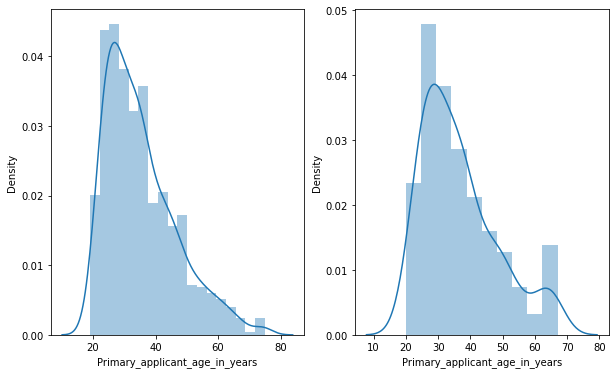

In [88]:
fig,ax = plt.subplots(nrows = 1, ncols =2 ,figsize=(10,6))
sns.distplot(x_train_transform['Primary_applicant_age_in_years'], ax=ax[0])
sns.distplot(x_test_transform['Primary_applicant_age_in_years'], ax =ax[1] )

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal_loan_amount', ylabel='Density'>

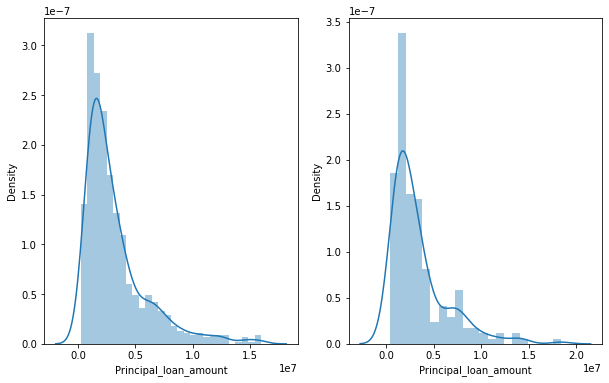

In [89]:
fig,ax = plt.subplots(nrows = 1, ncols =2 ,figsize=(10,6))
sns.distplot(x_train_transform['Principal_loan_amount'], ax=ax[0])
sns.distplot(x_test_transform['Principal_loan_amount'], ax =ax[1] )

### Applying log transformer in these 2 columns to transform them into normal distribution

In [91]:
x_train_transform['Principal_loan_amount'] = np.log(x_train_transform['Principal_loan_amount'])
x_test_transform['Principal_loan_amount'] = np.log(x_test_transform['Principal_loan_amount'])

x_train_transform['Primary_applicant_age_in_years'] = np.log(x_train_transform['Primary_applicant_age_in_years'])
x_test_transform['Primary_applicant_age_in_years'] = np.log(x_test_transform['Primary_applicant_age_in_years'])

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal_loan_amount', ylabel='Density'>

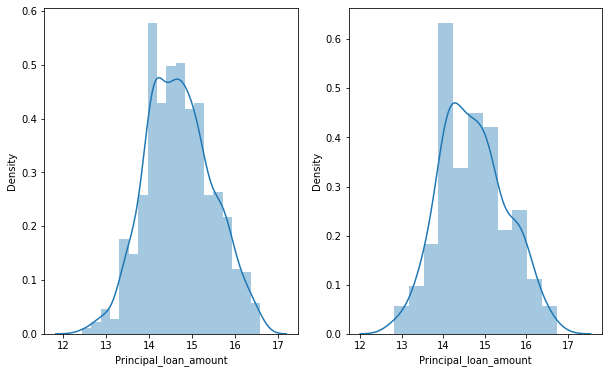

In [92]:
fig,ax = plt.subplots(nrows = 1, ncols =2 ,figsize=(10,6))
sns.distplot(x_train_transform['Principal_loan_amount'], ax=ax[0])
sns.distplot(x_test_transform['Principal_loan_amount'], ax =ax[1] )

## 5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.

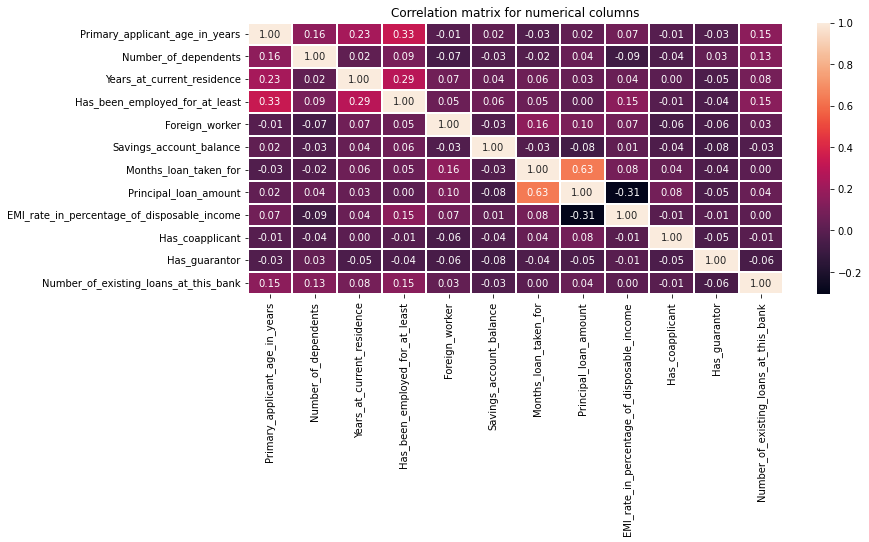

In [110]:
plt.figure(figsize=(12,5))
sns.heatmap(x_train_transform.corr(),annot=True , fmt='.2f',linewidth=0.2)
plt.title("Correlation matrix for numerical columns")
plt.show()

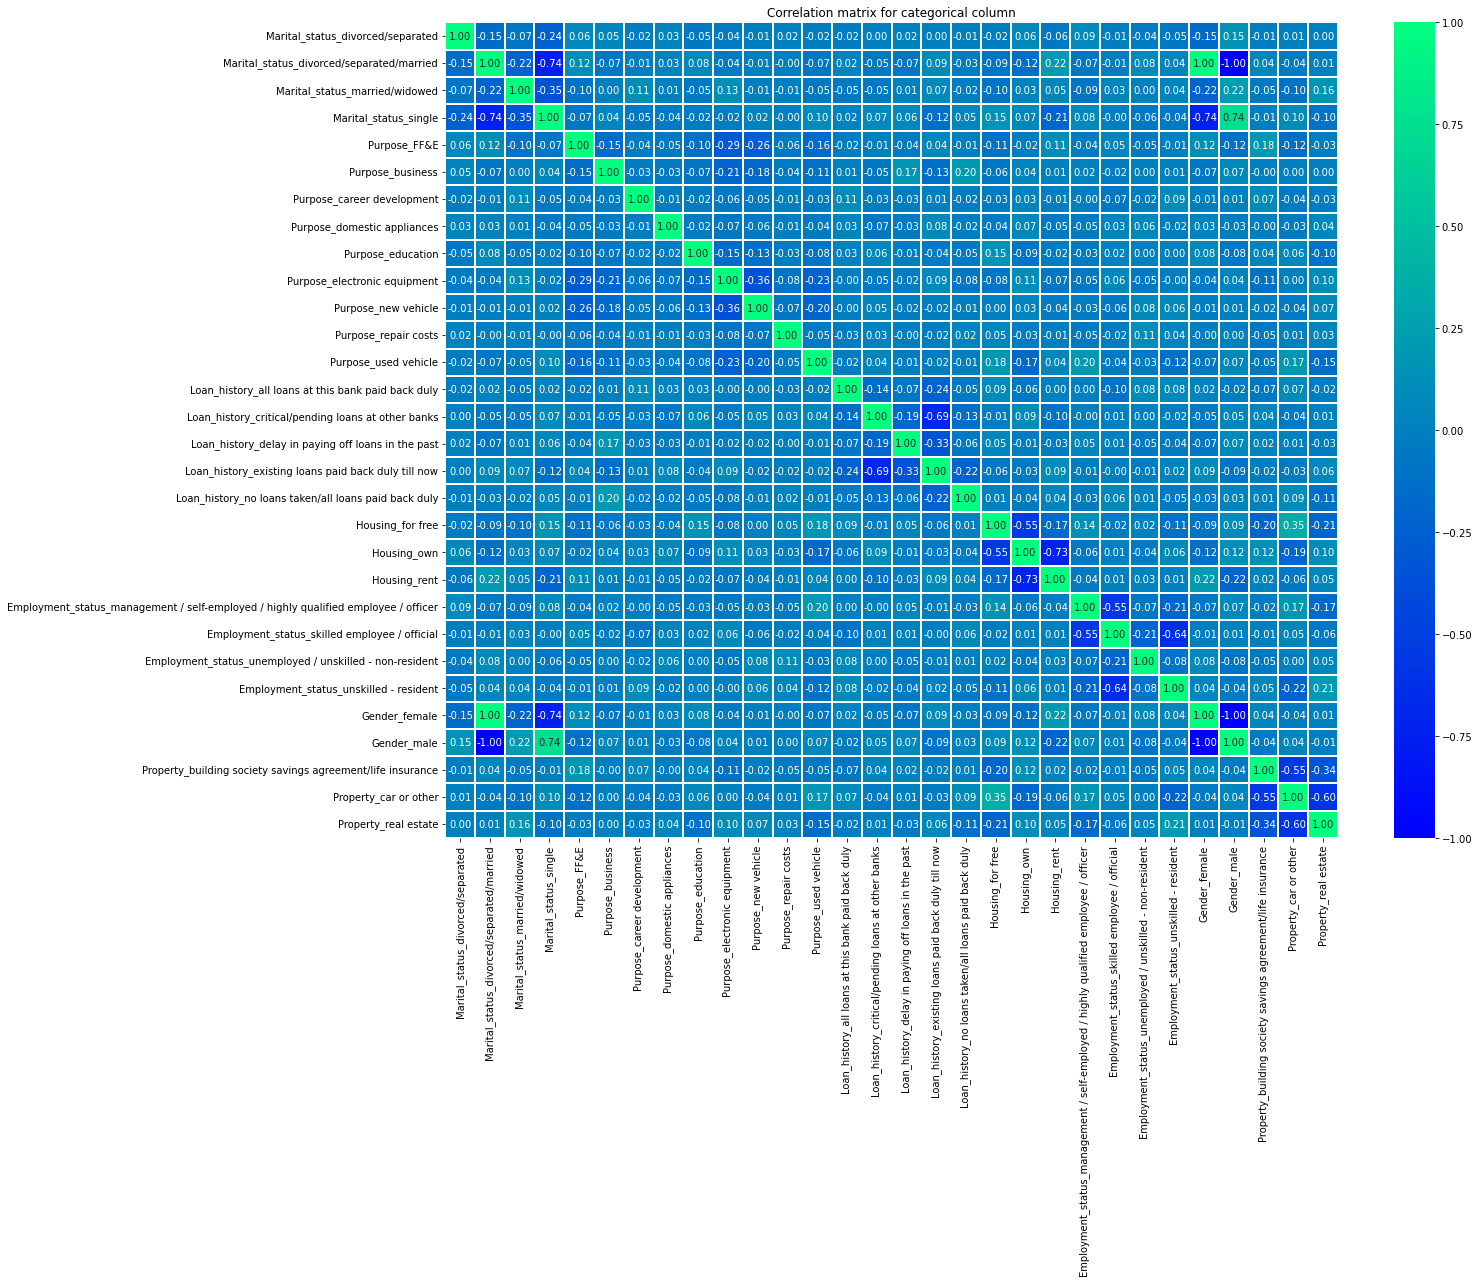

In [122]:
plt.figure(figsize=(20,15))
sns.heatmap(x_train_ohe.corr(),annot=True , linewidths=0.2 , fmt='.2f',cmap='winter')
plt.title("Correlation matrix for categorical column")
plt.show()

### Observations:
- Here the `Principal_loan_amount` and `Months_loan_taken_for` are highly correlated because as the amount of loan increases then the Number of months loan is taken for also increases.
- `Primary_applicant_age_in_years` and `Has_been_employed_for_at_least` are correlated because as the age increases, the employment years also increases.
- `Primary_applicant_age_in_years` and `Years_at_current_residence` are also correlated because as the age increases, the years at the living residence also increases.
- `Years_at_current_residence` and `Has_been_employed_for_at_least` are correlated because if a person is living at same place for many years, then the employment years will also increase.
- `Principal_loan_amount` is negatively correlated with `EMI_rate_in_percentage_of_disposable_income` because as the amount increases the EMI rate will decrease.
- `Marital_status_married/widowed` is negatively correlated with `Marital_status_single` as is a person is married then they will no longer be single
- `Marital_status_single` is highly correlated with `Gender` column. According to correlation matrix Male applicants are more likely to be single and female applicants are more likely to be married/widowed.

### Combining the numerical column and one hot encoded columns

In [123]:
x_train_model = pd.concat([x_train_transform , x_train_ohe] , axis=1)
x_test_model = pd.concat([x_test_transform , x_test_ohe] , axis=1)


In [125]:
x_train_model.head()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,...,Housing_rent,Employment_status_management / self-employed / highly qualified employee / officer,Employment_status_skilled employee / official,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident,Gender_female,Gender_male,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate
738,3.806662,2,3,4,1,1,6,15.726681,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
103,3.555348,1,3,4,1,1,9,14.467315,4,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
212,3.912023,1,4,1,1,1,27,15.481896,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
717,3.465736,1,2,1,1,1,18,14.224303,4,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
806,3.258097,1,3,0,0,1,6,13.287878,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## 6. Which ML algorithm you plan to use for modeling.

**Now we will train a machine learning model**
- We will use the following machine learning models:
1. Random Forest Classifier
2. Logistic Regression
3. KNN
4. Stacking Classifier
3. XGBoost Classifier

## 8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.


In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [134]:
# function 
def evaluation(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print("Accuracy Score :",accuracy_score(y_test , y_pred))
    print("Precision Score :",precision_score(y_test , y_pred))
    print("Recall score :", recall_score(y_test, y_pred))
    print("f1 score :",recall_score(y_test,y_pred))
    
    print("*"*50)
    print("*"*50)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    print("*"*50)
    print("*"*50)
    print("Classification Report:\n",classification_report(y_test, y_pred))

In [198]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

### Random Forest

In [136]:
rf = RandomForestClassifier()
rf.fit(x_train_model, y_train)

RandomForestClassifier()

In [137]:
evaluation(rf, x_test_model , y_test)

Accuracy Score : 0.725
Precision Score : 0.75
Recall score : 0.23076923076923078
f1 score : 0.23076923076923078
**************************************************
**************************************************
Confusion Matrix:
 [[130   5]
 [ 50  15]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.83       135
           1       0.75      0.23      0.35        65

    accuracy                           0.73       200
   macro avg       0.74      0.60      0.59       200
weighted avg       0.73      0.72      0.67       200



In [178]:
confusion_matrix(y_test,rf.predict(x_test_model))

array([[130,   5],
       [ 50,  15]], dtype=int64)

### Stacking Classifier

In [156]:
estimators = [("knn",KNeighborsClassifier(n_neighbors=5) ),("lr",LogisticRegression()),("dt",RandomForestClassifier())]

In [157]:
sc = StackingClassifier(estimators= estimators, final_estimator= LogisticRegression(), cv=10)

In [158]:
sc.fit(x_train_model, y_train)

D:\Anaconda\in\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\in\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

StackingClassifier(cv=10,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression()),
                               ('dt', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [159]:
evaluation(sc , x_test_model, y_test)

Accuracy Score : 0.735
Precision Score : 0.7727272727272727
Recall score : 0.26153846153846155
f1 score : 0.26153846153846155
**************************************************
**************************************************
Confusion Matrix:
 [[130   5]
 [ 48  17]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       135
           1       0.77      0.26      0.39        65

    accuracy                           0.73       200
   macro avg       0.75      0.61      0.61       200
weighted avg       0.74      0.73      0.69       200



### XGBoost

In [160]:
xgb = XGBClassifier(n_estimators = 1000, learning_rate= 0.05)

In [161]:
xgb.fit(x_train_model, y_train , early_stopping_rounds = 5, 
       eval_set = [(x_test_model, y_test)], verbose=False)

D:\Anaconda\in\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [162]:
evaluation(xgb , x_test_model , y_test)

Accuracy Score : 0.74
Precision Score : 0.7241379310344828
Recall score : 0.3230769230769231
f1 score : 0.3230769230769231
**************************************************
**************************************************
Confusion Matrix:
 [[127   8]
 [ 44  21]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       135
           1       0.72      0.32      0.45        65

    accuracy                           0.74       200
   macro avg       0.73      0.63      0.64       200
weighted avg       0.74      0.74      0.71       200



### Logistic Regression

In [192]:
lr = LogisticRegression()
lr.fit(x_train_model, y_train)
evaluation(lr , x_test_model, y_test)

Accuracy Score : 0.75
Precision Score : 0.7419354838709677
Recall score : 0.35384615384615387
f1 score : 0.35384615384615387
**************************************************
**************************************************
Confusion Matrix:
 [[127   8]
 [ 42  23]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       135
           1       0.74      0.35      0.48        65

    accuracy                           0.75       200
   macro avg       0.75      0.65      0.66       200
weighted avg       0.75      0.75      0.72       200



D:\Anaconda\in\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNeighborsClassifier

In [193]:
knn = KNeighborsClassifier()
knn.fit(x_train_model , y_train)
evaluation(knn , x_test_model , y_test)

Accuracy Score : 0.69
Precision Score : 0.56
Recall score : 0.2153846153846154
f1 score : 0.2153846153846154
**************************************************
**************************************************
Confusion Matrix:
 [[124  11]
 [ 51  14]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80       135
           1       0.56      0.22      0.31        65

    accuracy                           0.69       200
   macro avg       0.63      0.57      0.56       200
weighted avg       0.66      0.69      0.64       200



### Bagging Classifier

In [201]:
bag = BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=500 , max_samples=0.25, 
                       bootstrap= True ,max_features=0.5, bootstrap_features= True )

In [202]:
bag.fit(x_train_model , y_train)
evaluation(bag , x_test_model , y_test)

Accuracy Score : 0.71
Precision Score : 1.0
Recall score : 0.1076923076923077
f1 score : 0.1076923076923077
**************************************************
**************************************************
Confusion Matrix:
 [[135   0]
 [ 58   7]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       135
           1       1.00      0.11      0.19        65

    accuracy                           0.71       200
   macro avg       0.85      0.55      0.51       200
weighted avg       0.80      0.71      0.62       200



In [203]:
grid = {"rf": RandomForestClassifier(),
        "sc": StackingClassifier(estimators= estimators, final_estimator= LogisticRegression(), cv=10),
        "xgb":XGBClassifier(n_estimators = 2000 , 
                    learning_rate = 0.01 , 
                    n_jobs = 4),
        "lr":LogisticRegression(),
        "bag":BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=500 , max_samples=0.25, 
                       bootstrap= True ,max_features=0.5, bootstrap_features= True )}

In [204]:
accuracy = []
precision = []
recall = []
f1 = []
for name,model in grid.items():
    model.fit(x_train_model , y_train)
        
    y_pred = model.predict(x_test_model)
    accuracy.append(accuracy_score(y_test , y_pred))
    precision.append(precision_score(y_test , y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test, y_pred))


D:\Anaconda\in\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\in\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

In [205]:
ev = pd.DataFrame({"Accuracy":accuracy,'Precision':precision, "Recall":recall, "F1 score":f1},index=['RandomForest','Stacking','XGB',"LogisticRegression","Bagging"])
ev

,Accuracy,Precision,Recall,F1 score
RandomForest,0.720,0.764706,0.200000,0.317073
Stacking,0.745,0.818182,0.276923,0.413793
XGB,0.725,0.647059,0.338462,0.444444
LogisticRegression,0.750,0.741935,0.353846,0.479167
Bagging,0.705,1.000000,0.092308,0.169014


## 9. How you will select the hyperparameters for models trained in above step.

We will choose the best hyper parameter by performing Hyper-parameter tuining using RandomizedSearchCV and GridSearchCV

In [179]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### RandomForestClassifier hyper parameter tuining

In [187]:
param_grid1 = {'n_estimators':np.arange(300,500,50),
              "max_features":['auto'],
              "min_samples_leaf": np.arange(3,10,2),
              "min_samples_split": np.arange(2,10,2),
              "oob_score":[ False],
              'bootstrap':[True ],
              "max_depth":np.arange(50,250,50)
             }

In [188]:
model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid1,cv=5 , verbose=True )

In [189]:
model.fit(x_train_model, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'max_depth': array([ 50, 100, 150, 200]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([300, 350, 400, 450]),
                         'oob_score': [False]},
             verbose=True)

In [190]:
evaluation(model, x_test_model, y_test)

Accuracy Score : 0.72
Precision Score : 0.8
Recall score : 0.18461538461538463
f1 score : 0.18461538461538463
**************************************************
**************************************************
Confusion Matrix:
 [[132   3]
 [ 53  12]]
**************************************************
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.83       135
           1       0.80      0.18      0.30        65

    accuracy                           0.72       200
   macro avg       0.76      0.58      0.56       200
weighted avg       0.74      0.72      0.65       200



## 10. Which metric(s) you will choose to select between the set of models.

**As it was stated that it is worse to state an applicant as a low credit risk(0) when they are actually a high risk(1), than it is to state an applicant to be a high credit risk when they aren’t.**

**So we will have to minimize the False Negative (model will predict 0 when the real value is 1).**

**For this we will use the `Recall` as evaluation matrix. Recall should be high.**

## `The best accuracy and Recall is given by Logistic Regression model`

## 11. Explain how you will export the trained models & deploy it for prediction in production.

Now we will use `pickle` library to export the model. 

Then we can use `Flask` to make a website and deploy this trained model on that web site so that the predictions can be made on that website.

In [206]:
import pickle

In [207]:
pickle.dump(lr, open('lr.pkl', 'wb'))